# Principal Component Analysis with Cancer Data

In [35]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [36]:
df_bcw = pd.read_csv("breast-cancer-wisconsin-data.csv")
df_bcw.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [38]:
# drop ID column and save in DF
df = df_bcw.copy().drop(labels=['ID'],axis=1)

In [39]:
X = df_bcw.iloc[:,1:]
y = X.pop("Class")

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [41]:
df.shape

(699, 10)

In [42]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [43]:
df[df["Class"]==2].describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.0
mean,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319,2.0
std,1.674318,0.907694,0.997836,0.996830,0.917130,1.080339,1.058856,0.501995,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.0
75%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.0
max,8.000000,9.000000,8.000000,10.000000,10.000000,7.000000,9.000000,8.000000,2.0


In [44]:
df[df["Class"]==4].describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212,4.0
std,2.428849,2.719512,2.562045,3.210465,2.451606,2.273852,3.350672,2.557939,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,7.000000,6.000000,1.000000,4.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,7.000000,10.000000,3.000000,4.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0


1. There are two classes 2 and 4 with.
2. class 2 has double the data that of calss 4
3. All attributes are numeric except for base Nuclei which has 11 unique values 
4. Bare Nuclei	has few unknown valued

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [45]:
# We could see "?" values in column, this should be removed from data set
df[df['Bare Nuclei'].str.isnumeric()==False]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [46]:
# Check 
df[df['Bare Nuclei'].str.isnumeric()==True].astype('int').describe()['Bare Nuclei']

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare Nuclei, dtype: float64

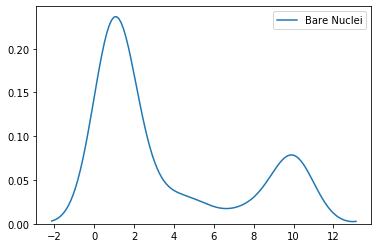

In [47]:
sns.kdeplot((df['Bare Nuclei'][df['Bare Nuclei'].str.isnumeric()==True].astype('int')))

we can see that data for Bare Nuclei is skewed and long right tail having two Modes.

It would not be advisable to impute the missing values with either mean or Mode

For Now we will use median to impute mising values 

In [48]:
# Check for missing value in any other column
df.isna().count()/len(df)

ClumpThickness                 1.0
Cell Size                      1.0
Cell Shape                     1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    1.0
Bare Nuclei                    1.0
Normal Nucleoli                1.0
Bland Chromatin                1.0
Mitoses                        1.0
Class                          1.0
dtype: float64

There are no missing values or NaNs

In [49]:
# No missing values found. So let us try to remove ? from bare nuclei column
missing_count= df['Bare Nuclei'][df['Bare Nuclei'].str.isnumeric()==False].count()
# Get count of rows having ?
print ("There are %0.0f Vlaues having '?' string " %missing_count)

There are 16 Vlaues having '?' string 


In [53]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# replace ? with NaN so that we can change it to numeric
df['Bare Nuclei'].replace(to_replace = '?', value = np.nan,inplace=True )

# Impute with Median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Bare Nuclei'] = imputer.fit_transform(np.reshape(df['Bare Nuclei'].values,(-1,1))) 

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [57]:
# Check for correlation of variable
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

/var/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/var/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


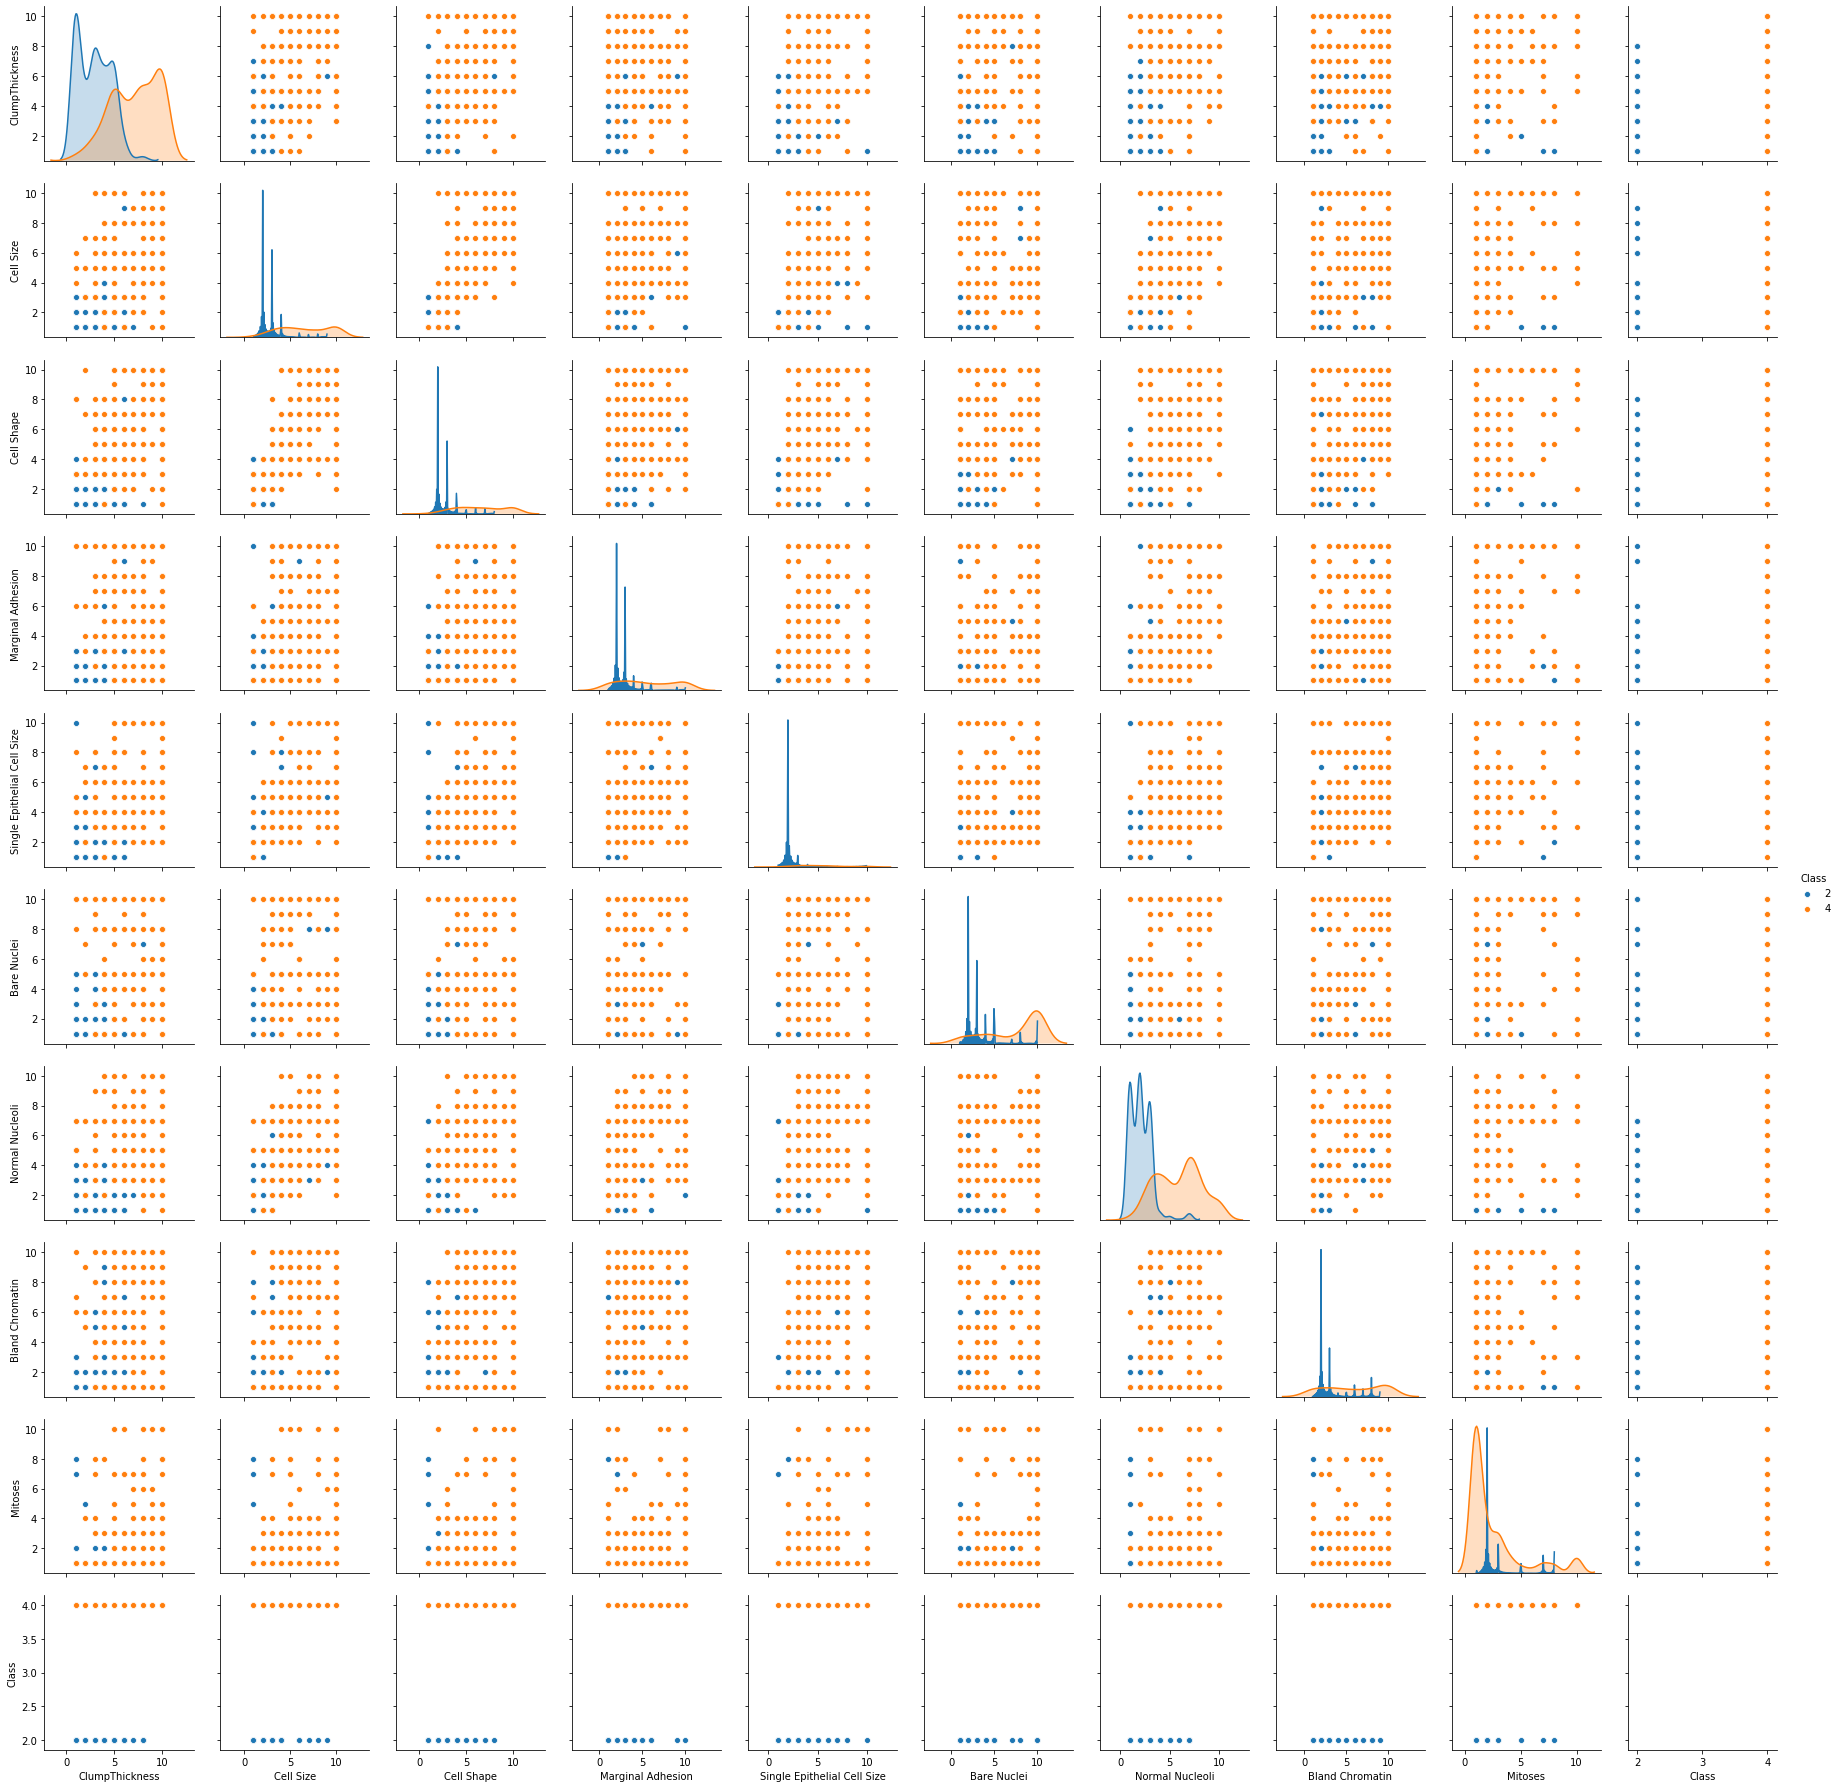

In [58]:
#Let us check for pair plots
sns.pairplot(df,hue='Class')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [60]:
# The data should be slipt before removing outliers 
X = df.copy()
y = X.pop('Class')

In [ ]:
# remove outliers

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [78]:
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [74]:
# We could see most of the outliers are now removed.

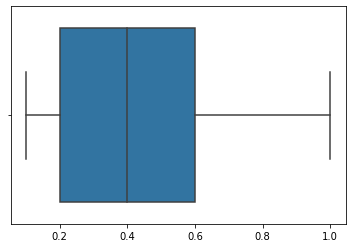

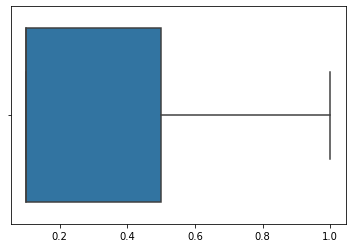

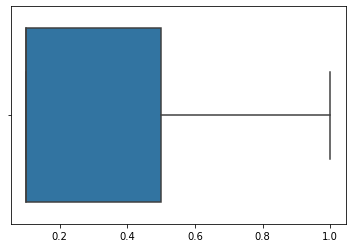

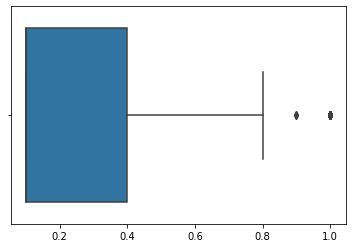

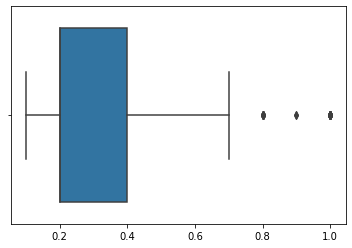

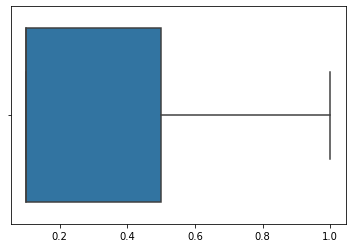

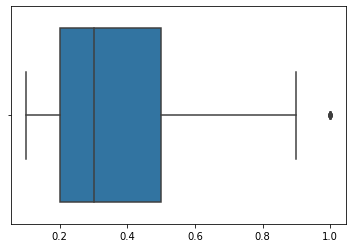

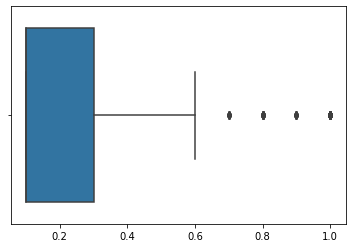

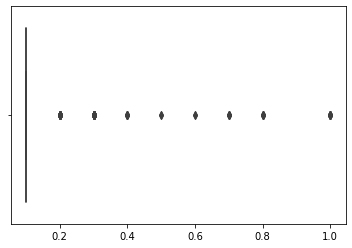

In [75]:
for cols in range(len(X.columns)):
    sns.boxplot(X_train_scale[:,cols])
    plt.show()

In [ ]:
X_test

# Q6 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [80]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA()
X_train_reduce = pca.fit_transform(X_test_std)
var = pca.explained_variance_
print (var)

[6.0820365  0.83215352 0.53131551 0.49285055 0.32903746 0.26506348
 0.23561493 0.19102832 0.08396194]


In [97]:

total = sum(var)
var_exp = [( i /total ) * 100 for i in sorted(var, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 67.25638241  76.4585033   82.33389699  87.78393746  91.4224998
  94.35362506  96.95910237  99.07153197 100.        ]


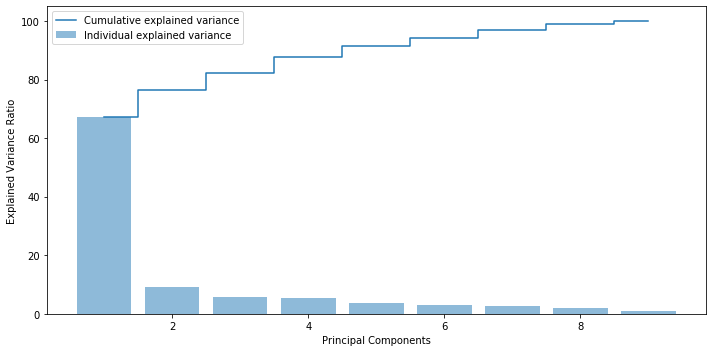

In [99]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, var.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, var.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Content Based Recommendation System - Optional ( Q7 - Q15 will not be graded)

# Q7 Read the Dataset `movies_metadata.csv`

# Q8 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q9 Lets drop the null values in `description` column

# Q10 Keep the first occurance and drop duplicates of each title in column `title`

# Q11  As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q12  Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q13  Create cosine similarity matrix

# Q 14  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q15 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q16 Read the dataset(jokes.csv)

# Q17 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q18 Change the column indices from 0 to 99

# Q19 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q20 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q21  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.